In [1]:
!ls

EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv
PanCanAtlas_miRNA_sample_information_list.txt
TCGA-CDR-SupplementalTableS1.xlsx
TCGA-RPPA-pancan-clean.txt
Untitled.ipynb
jhu-usc.edu_PANCAN_HumanMethylation450.betaValue_whitelisted.tsv
jhu-usc.edu_PANCAN_merged_HumanMethylation27_HumanMethylation450.betaValue_whitelisted.tsv
jhu-usc.hfQDEKjh.edu_PANCAN_HumanMethylation450.betaValue_whitelisted.tsv.part
pancanMiRs_EBadjOnProtocolPlatformWithoutRepsWithUnCorrectMiRs_08_04_16.csv


In [2]:
import pandas as pd

In [5]:
df_gene=pd.read_csv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv', delimiter='\t')

In [3]:
#dfb=pd.read_csv('jhu-usc.edu_PANCAN_merged_HumanMethylation27_HumanMethylation450.betaValue_whitelisted.tsv', delimiter='\t')
df_mirna=pd.read_csv('pancanMiRs_EBadjOnProtocolPlatformWithoutRepsWithUnCorrectMiRs_08_04_16.csv') #, delimiter='\t')

In [2]:
df_meth=pd.read_csv('jhu-usc.edu_PANCAN_merged_HumanMethylation27_HumanMethylation450.betaValue_whitelisted.tsv', delimiter='\t')

In [4]:
df_rppa=pd.read_csv('TCGA-RPPA-pancan-clean.txt', delimiter='\t')

In [5]:
#print(df_gene.shape)
print(df_mirna.shape)
#print(df_meth.shape)
print(df_rppa.shape)

(743, 10826)
(7790, 200)


In [12]:
df_mirna = df_mirna[df_mirna.Correction == "Corrected"].set_index('Genes').drop('Correction',axis=1)

In [13]:
df_mirna.to_csv('mirna_proc.csv')

In [19]:
df_rppa.set_index('SampleID').T.drop('TumorType').to_csv('rppa_proc.csv')

In [6]:
#df_meth = df_meth.set_index('Composite Element REF')
df_gene = df_gene.set_index('gene_id')

In [9]:
df_meth.mean(axis=1).shape

(22601,)

In [7]:
#df_meth = df_meth.apply(lambda x: (x-x.mean()).abs(), axis=1)
df_gene = df_gene.apply(lambda x: (x-x.mean()).abs(), axis=1)


KeyboardInterrupt



In [11]:
df_meth = df_meth.rank()

In [26]:
df_meth_ranked = pd.DataFrame()

In [38]:
for column in df_meth:
    df_meth_ranked[column]=df_meth[column].nsmallest(800).index.to_series().values

In [37]:
df_meth['TCGA-02-0001-01C-01D-0186-05'].nsmallest(800).index.to_series().values

array(['cg15569340', 'cg03320844', 'cg22193702', 'cg20383064',
       'cg07218192', 'cg22827640', 'cg24441911', 'cg03969997',
       'cg15746445', 'cg18204685', 'cg16534233', 'cg20317180',
       'cg27470406', 'cg13917504', 'cg00331433', 'cg25993152',
       'cg10912268', 'cg13451483', 'cg26656452', 'cg06276653',
       'cg18930892', 'cg00164898', 'cg22584335', 'cg13539030',
       'cg25605045', 'cg15121304', 'cg24789424', 'cg06684910',
       'cg19859270', 'cg17178888', 'cg03947362', 'cg12256228',
       'cg18627852', 'cg25544551', 'cg21911019', 'cg15127806',
       'cg13199822', 'cg09556292', 'cg13206017', 'cg17142134',
       'cg04936930', 'cg01333619', 'cg19523692', 'cg22736107',
       'cg24386906', 'cg01192952', 'cg16280667', 'cg14501253',
       'cg21167159', 'cg10145369', 'cg23940655', 'cg12788471',
       'cg01959848', 'cg21631754', 'cg26728422', 'cg01414934',
       'cg03100146', 'cg26895595', 'cg22880820', 'cg05695927',
       'cg17575811', 'cg00323915', 'cg21849289', 'cg214

In [43]:
df_meth_ranked.reset_index(drop=True, inplace=True)

(array([ 30.,  96., 170., 225., 234., 282., 283., 288., 315., 292., 331.,
        335., 382., 370., 386., 436., 449., 430., 447., 401., 448., 403.,
        347., 386., 357., 296., 307., 284., 320., 318., 284., 270., 291.,
        317., 299., 320., 361., 334., 389., 336., 399., 413., 437., 456.,
        454., 397., 452., 474., 447., 405., 429., 442., 420., 373., 331.,
        331., 296., 260., 213., 171., 165., 158., 129., 108., 104.,  94.,
         91.,  72.,  72.,  59.,  57.,  76.,  66.,  71.,  64.,  70.,  57.,
         70.,  66.,  67.,  72.,  58.,  70.,  52.,  57.,  42.,  25.,  32.,
         15.,   3.,   5.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  10.  ,   21.78,   33.56,   45.34,   57.12,   68.9 ,   80.68,
          92.46,  104.24,  116.02,  127.8 ,  139.58,  151.36,  163.14,
         174.92,  186.7 ,  198.48,  210.26,  222.04,  233.82,  245.6 ,
         257.38,  269.16,  280.94,  292.72,  304.5 ,  316.28,  328.06,
         339.84,  351.62,  363.4 ,

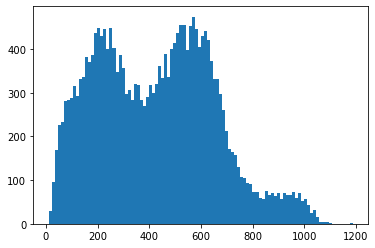

In [54]:
import matplotlib.pyplot as plt
plt.hist(df_meth_ranked.stack().value_counts(),bins=100)

In [7]:
import numpy as np
#df_meth = df_meth.reindex(df_meth.var(axis=1).sort_values().index, axis=0) #sort by row variance
df_gene = df_gene.dropna().replace(0, np.NaN)
df_gene = df_gene.reindex(df_gene.var(axis=1).sort_values().index, axis=0) #sort by row variance

In [7]:
df_meth.var(axis=1)

Composite Element REF
cg10474368    0.000006
cg13946860    0.000008
cg00770871    0.000008
cg11246695    0.000008
cg04589975    0.000008
                ...   
cg06051311    0.095170
cg08668790    0.096515
cg21790626    0.097518
cg20916523    0.104639
cg12374721    0.110510
Length: 22601, dtype: float64

In [12]:
df_meth.dropna().tail(800).to_csv("methyl_top800.csv")

In [14]:
df_gene.dropna().tail(1000).to_csv("gene_top1000.csv")

(array([3042., 3111., 2637., 1495.,  483.,  186.,   70.,   30.,   11.,
           4.]),
 array([ 0. ,  8.3, 16.6, 24.9, 33.2, 41.5, 49.8, 58.1, 66.4, 74.7, 83. ]),
 <BarContainer object of 10 artists>)

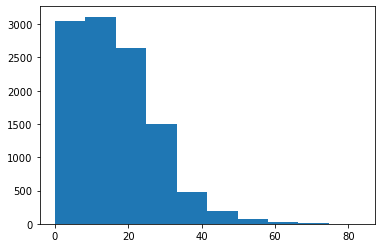

In [12]:
import matplotlib.pyplot as plt
plt.hist(df_gene.tail(800).isna().sum())

In [13]:
df_gene.shape

(16335, 11069)

# Processing all

In [9]:
import pandas as pd
df_g=pd.read_csv('gene_top800.csv', index_col=0).T
df_p=pd.read_csv('rppa_proc.csv', index_col=0).T
df_m=pd.read_csv('methyl_top800.csv', index_col=0).T
df_r=pd.read_csv('mirna_proc.csv', index_col=0).T

In [45]:
def inds(x):
    return "_".join(x.split('-')[1:4])
df_g.index = df_g.index.map(inds)
df_p.index = df_p.index.map(inds)
df_m.index = df_m.index.map(inds)
df_r.index = df_r.index.map(inds)

Genes,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-95-3p,hsa-miR-9-5p,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
C4_A0F6_01A,0.980776,32.785934,17787.06993,6.725320,6875.798894,2.241773,598.553468,497.533559,321.974688,34.046932,...,0.980776,86.588493,0.280222,93.874256,2.662106,188.869399,0.420332,148.377369,195.034276,78432.081350
CU_A0YO_01A,2.750555,62.595962,20816.36637,11.835721,6014.963519,6.001211,1424.704101,340.652060,168.700702,16.336629,...,3.334006,1624.244358,0.000000,34.506962,1.083552,100.353580,1.333602,412.749939,23.588092,13279.762530
BT_A0S7_01A,7.085729,64.480134,64187.20949,41.238943,34652.048900,20.548614,3788.172416,335.296694,250.409661,13.321170,...,3.401150,757.039282,0.000000,11.904025,0.850287,76.100729,2.125719,694.826582,59.803552,29537.994880
CU_A0YR_01A,0.805977,17.731490,31852.20320,14.104594,7643.480998,0.805977,147.896743,534.362619,385.659900,5.641838,...,1.208965,686.289247,0.000000,24.985281,0.402988,223.658562,0.000000,11.686664,29.015165,13749.158260
BL_A0C8_01A,0.803256,32.397995,36701.57350,18.207138,5972.744450,1.874264,220.627670,380.475629,318.357159,16.332874,...,3.213024,92.106697,0.267752,65.866998,1.606512,60.511958,0.000000,34.004507,56.763430,36226.313650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AG_3584_01A,3.262839,22.251037,23122.91869,20.626534,4760.875509,3.716744,599.077677,1011.271201,146.193566,4.721912,...,13.372890,10624.689830,0.301215,26.510692,0.987116,41.168575,1.073576,109.400542,14.142076,10462.448760
AG_3599_01A,2.002213,29.156045,17890.75858,28.611334,5660.590915,0.830712,222.252058,350.019624,125.544726,3.213865,...,25.697846,188.922382,0.791547,35.627721,0.467073,27.308137,0.144723,45.617460,15.948184,8293.054733
AG_3583_01A,0.675954,19.786044,16792.88093,22.441202,7572.840852,1.282126,143.450672,897.205621,76.690747,1.497562,...,15.811903,147.011379,-0.127951,10.352813,5.508178,51.327181,0.146054,28.874467,22.412294,6427.100677
AG_3598_01A,1.948157,25.893893,23153.80168,41.672361,6127.299751,3.081652,324.642671,498.491969,133.758828,4.168296,...,7.845190,172.341403,-0.127951,15.302715,1.541097,22.493043,0.351305,78.511647,26.015522,18854.100830


In [11]:
df_g.index.intersection(df_p.index)

Index([], dtype='object')

In [17]:
df_g.index.intersection(df_m.index)

Index([], dtype='object')

In [18]:
df_m.index

Index(['TCGA-02-0001-01C-01D-0186-05', 'TCGA-02-0003-01A-01D-0186-05',
       'TCGA-02-0006-01B-01D-0186-05', 'TCGA-02-0007-01A-01D-0186-05',
       'TCGA-02-0009-01A-01D-0186-05', 'TCGA-02-0010-01A-01D-0186-05',
       'TCGA-02-0011-01B-01D-0186-05', 'TCGA-02-0014-01A-01D-0186-05',
       'TCGA-02-0021-01A-01D-0186-05', 'TCGA-02-0024-01B-01D-0186-05',
       ...
       'TCGA-W5-AA2R-11A-11D-A418-05', 'TCGA-W5-AA2U-11A-11D-A418-05',
       'TCGA-W5-AA2X-11A-11D-A418-05', 'TCGA-W5-AA30-11A-11D-A418-05',
       'TCGA-W5-AA31-11A-11D-A418-05', 'TCGA-W5-AA34-11A-11D-A418-05',
       'TCGA-X7-A8D6-11A-22D-A424-05', 'TCGA-X7-A8D7-11A-11D-A424-05',
       'TCGA-YB-A89D-11A-11D-A368-05', 'TCGA-ZU-A8S4-11A-11D-A418-05'],
      dtype='object', length=12039)

In [53]:
#t_m=['-'.join(x.split('-')[1:4]) for x in df_m.index]
#t_g=['-'.join(x.split('-')[1:4]) for x in df_g.index]
#t_p=['-'.join(x.split('-')[1:4]) for x in df_p.index]
#t_r=['-'.join(x.split('-')[1:4]) for x in df_r.index]
len(set(df_m.index.to_list()) & set(t_g.index) & set(t_p.index) & set(t_r.index))

TypeError: 'builtin_function_or_method' object is not iterable

In [61]:
joint_idx = sorted(list(set(df_m.index.to_list()) & set(df_g.index.to_list()) & set(df_p.index.to_list()) & set(df_r.index.to_list())))

In [68]:
df_m=df_m.loc[joint_idx].reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

In [69]:
df_g=df_g.loc[joint_idx].reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

In [70]:
df_p=df_p.loc[joint_idx].reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

In [71]:
df_r=df_r.loc[joint_idx].reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

In [72]:
df_m.to_csv('unnorm_m.csv')
df_g.to_csv('unnorm_g.csv')
df_p.to_csv('unnorm_p.csv')
df_r.to_csv('unnorm_r.csv')

In [52]:
df_m=(df_m-df_m.mean())/df_m.std()
df_g=(df_g-df_g.mean())/df_g.std()
df_p=(df_p-df_p.mean())/df_p.std()
df_r=(df_r-df_r.mean())/df_r.std()

In [74]:
df_m.to_csv('norm_m.csv')
df_g.to_csv('norm_g.csv')
df_p.to_csv('norm_p.csv')
df_r.to_csv('norm_r.csv')

In [8]:
import pandas as pd
df_m = pd.read_csv('norm_m.csv', index_col=0)
df_g = pd.read_csv('norm_g.csv', index_col=0)
df_p = pd.read_csv('norm_p.csv', index_col=0)
df_r = pd.read_csv('norm_r.csv', index_col=0)

In [54]:
print(df_p.max().max())
print(df_g.max().max())
print(df_m.max().max())
print(df_r.max().max())
print(df_p.min().min())
print(df_g.min().min())
print(df_m.min().min())
print(df_r.min().min())


14.856979902726602
83.72562760034862
3.70456583272228
82.32616281526866
-10.858894138207347
-2.57937893807929
-3.5166882006545452
-1.7276260399214667


In [56]:
df_p = df_p.fillna(-10000)

In [57]:
print(df_m.isnull().sum().sum())
print(df_g.isnull().sum().sum())
print(df_p.isnull().sum().sum()/df_p.size)
print(df_r.isnull().sum().sum())

0
0
0.0
0


In [58]:
def generator():
    total = df_m.shape[0]
    for idx in range(total):
        i = df_m.index[idx]
        m = df_m.iloc[idx].values.tolist()
        g = df_g.iloc[idx].values.tolist()
        p = df_p.iloc[idx].values.tolist()
        r = df_r.iloc[idx].values.tolist()
        yield {"tcga_index":i, "gene": {"data": g},
              "protein": {"data": p},
              "methylation": {"data":m},
              "mirna": {"data": r}}

In [59]:
import datasets

In [60]:
ds = datasets.Dataset.from_generator(generator)

Generating train split: 0 examples [00:00, ? examples/s]

In [61]:
ds.save_to_disk('tcga_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/7017 [00:00<?, ? examples/s]

In [62]:
for col in list(ds[0].keys())[1:]:
    print(f"{col}:{len(ds[0][col]['data'])}")

gene:800
protein:198
methylation:800
mirna:662


In [41]:
list(ds[0].keys())[1:]

['gene', 'protein', 'methylation', 'mirna']